# **데이터 병합**

---



## **Concat 함수**
- 덩어리 + 덩어리
- Datafram끼리 서로 합치는 경우 (따로 join조건 등 없음)
- axis 축 설정
- ignore_index 병합 후 인덱스 재설정

In [1]:
import pandas as pd

In [2]:
df1 = pd.DataFrame({'A':[1,2,3], 'B':[4,5,6]})
df2 = pd.DataFrame({'A':[4,5], 'B':[6,7]})
df3 = pd.DataFrame({'A':[7,8,9], 'B':[10,11,12],'C':[13,14,15]})

In [7]:
display(df1)
display(df2)
display(df3)

,A,B
0,1,4
1,2,5
2,3,6


,A,B
0,4,6
1,5,7


,A,B,C
0,7,10,13
1,8,11,14
2,9,12,15


In [4]:
display(pd.concat([df1,df2], axis=0)) # 세로
display(pd.concat([df1,df2], axis=1)) # 가로

,A,B
0,1,4
1,2,5
2,3,6
0,4,6
1,5,7


,A,B,A,B
0,1,4,4.0,6.0
1,2,5,5.0,7.0
2,3,6,NaN,NaN


In [5]:
# 먼저 쓴 df을 기본 축으로
display(pd.concat([df2,df1], axis=0))
display(pd.concat([df2,df1], axis=1))

,A,B
0,4,6
1,5,7
0,1,4
1,2,5
2,3,6


,A,B,A,B
0,4.0,6.0,1,4
1,5.0,7.0,2,5
2,NaN,NaN,3,6


In [6]:
# 인덱스 새로 정렬
display(pd.concat([df2,df1], axis=0,ignore_index= True))

,A,B
0,4,6
1,5,7
2,1,4
3,2,5
4,3,6


In [8]:
display(pd.concat([df1, df2, df3], axis=0))
display(pd.concat([df1, df2, df3], axis=1))

,A,B,C
0,1,4,NaN
1,2,5,NaN
2,3,6,NaN
0,4,6,NaN
1,5,7,NaN
0,7,10,13.0
1,8,11,14.0
2,9,12,15.0


,A,B,A,B,A,B,C
0,1,4,4.0,6.0,7,10,13
1,2,5,5.0,7.0,8,11,14
2,3,6,NaN,NaN,9,12,15


## **merge 함수**
- join 함수 사용
- 공통 column 필요 (pk 개념)

> 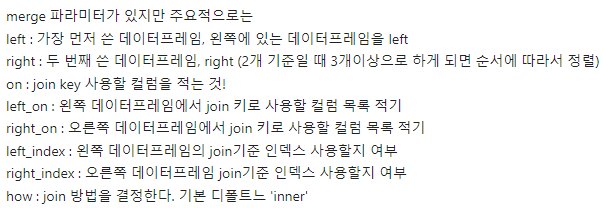



In [9]:
df1 = pd.DataFrame({'이름':['홍길동','박길동','김길동','이길동'], '반':['파문응','파문기','데분기','데분중']})
df2 = pd.DataFrame({'이름':['홍길동','박길동','오길동','이길동'], '점수':[100,50,80,90]})

In [10]:
display(df1)
display(df2)

,이름,반
0,홍길동,파문응
1,박길동,파문기
2,김길동,데분기
3,이길동,데분중


,이름,점수
0,홍길동,100
1,박길동,50
2,오길동,80
3,이길동,90


In [11]:
pd.merge(df1, df2, on='이름')

,이름,반,점수
0,홍길동,파문응,100
1,박길동,파문기,50
2,이길동,데분중,90


inner join (default) -> 교집합만 출력

### join key 2개 이상인 경우

In [12]:
df1 = pd.DataFrame({'이름':['홍길동','박길동','김길동','이길동'], '반':['파문응','파문기','데분기','데분중'],'학번':[20,21,22,23]})
df2 = pd.DataFrame({'이름':['홍길동','박길동','오길동','이길동'], '점수':[100,50,80,90],'학번':[20,19,22,23]})

In [13]:
display(df1)
display(df2)

,이름,반,학번
0,홍길동,파문응,20
1,박길동,파문기,21
2,김길동,데분기,22
3,이길동,데분중,23


,이름,점수,학번
0,홍길동,100,20
1,박길동,50,19
2,오길동,80,22
3,이길동,90,23


In [14]:
pd.merge(df1, df2, on=['이름','학번'])

,이름,반,학번,점수
0,홍길동,파문응,20,100
1,이길동,데분중,23,90


## left_on, right_on

In [16]:
df1 = pd.DataFrame({'이름':['홍길동','박길동','김길동','이길동'], '반':['파문응','파문기','데분기','데분중'],'번호':[20,21,22,23]})
df2 = pd.DataFrame({'이름':['홍길동','박길동','오길동','이길동'], '점수':[100,50,80,90],'학번':[20,19,22,23]})

In [17]:
display(df1)
display(df2)

,이름,반,번호
0,홍길동,파문응,20
1,박길동,파문기,21
2,김길동,데분기,22
3,이길동,데분중,23


,이름,점수,학번
0,홍길동,100,20
1,박길동,50,19
2,오길동,80,22
3,이길동,90,23


In [18]:
# 중복 나오는 경우
pd.merge(df1, df2, left_on='번호', right_on='학번')

,이름_x,반,번호,이름_y,점수,학번
0,홍길동,파문응,20,홍길동,100,20
1,김길동,데분기,22,오길동,80,22
2,이길동,데분중,23,이길동,90,23


In [19]:
# 중복 X
pd.merge(df1, df2, left_on='이름', right_on='이름')

,이름,반,번호,점수,학번
0,홍길동,파문응,20,100,20
1,박길동,파문기,21,50,19
2,이길동,데분중,23,90,23


## left_index, right_index

In [20]:
display(df1)
display(df2)

,이름,반,번호
0,홍길동,파문응,20
1,박길동,파문기,21
2,김길동,데분기,22
3,이길동,데분중,23


,이름,점수,학번
0,홍길동,100,20
1,박길동,50,19
2,오길동,80,22
3,이길동,90,23


In [21]:
# index '이름'으로 지정
df_sp = df1.set_index('이름')

In [22]:
df_sp

,반,번호
이름,,
홍길동,파문응,20
박길동,파문기,21
김길동,데분기,22
이길동,데분중,23


In [23]:
# right_on도 같이 지정해야함
pd.merge(df_sp, df2, left_index = True, right_on='이름')

,반,번호,이름,점수,학번
0,파문응,20,홍길동,100,20
1,파문기,21,박길동,50,19
3,데분중,23,이길동,90,23


## How
- 'inner' - 공통 컬럼 가지고 교집합된 것들만 병합
- 'left' - 왼쪽 df의 join key 기준으로 병합
- 'right' - 오른쪽 df의 join key 기준으로 병합
- 'outer'- 양쪽 df의 join key에 대한 합집합 기준으로 병합

In [24]:
df1 = pd.DataFrame({'이름':['A','B','C','D'], '반':['파문응','파문기','데분기','데분중']})
df2 = pd.DataFrame({'이름':['A','B','E','F'], '점수':[100,50,80,90]})

In [25]:
display(df1)
display(df2)

,이름,반
0,A,파문응
1,B,파문기
2,C,데분기
3,D,데분중


,이름,점수
0,A,100
1,B,50
2,E,80
3,F,90


In [26]:
pd.merge(df1, df2, on='이름', how='inner')

,이름,반,점수
0,A,파문응,100
1,B,파문기,50


In [27]:
pd.merge(df1,df2, on='이름',how='left')

,이름,반,점수
0,A,파문응,100.0
1,B,파문기,50.0
2,C,데분기,NaN
3,D,데분중,NaN


In [28]:
pd.merge(df1,df2, on='이름',how='right')

,이름,반,점수
0,A,파문응,100
1,B,파문기,50
2,E,NaN,80
3,F,NaN,90


In [29]:
pd.merge(df1,df2, on='이름',how='outer')

,이름,반,점수
0,A,파문응,100.0
1,B,파문기,50.0
2,C,데분기,NaN
3,D,데분중,NaN
4,E,NaN,80.0
5,F,NaN,90.0


데이터 병합할 때, 중복에 대하여 잘 체크한 후 병합해야함!

### 샘플 데이터 예시

In [30]:
site = pd.read_csv('survey_site.csv')
survey= pd.read_csv('survey_survey.csv')
vit = pd.read_csv('survey_visited.csv')

In [31]:
display(site)
display(survey)
display(vit)

,name,lat,long
0,DR-1,-49.85,-128.57
1,DR-3,-47.15,-126.72
2,MSK-4,-48.87,-123.40


,taken,person,quant,reading
0,619,dyer,rad,9.82
1,619,dyer,sal,0.13
2,622,dyer,rad,7.80
3,622,dyer,sal,0.09
4,734,pb,rad,8.41
5,734,lake,sal,0.05
6,734,pb,temp,-21.50
7,735,pb,rad,7.22
8,735,NaN,sal,0.06
9,735,NaN,temp,-26.00


,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1939-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,752,DR-3,NaN
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-03-22


3개 한번에 join 하지않고, 하나씩 join하여 3개를 하나의 테이블로 만드는 경우

In [32]:
# 1. site, vit join
mg = pd.merge(site, vit, left_on=['name'], right_on=['site'])

In [34]:
# 2. mg, survey join
pd.merge(mg, survey, left_on=['ident'], right_on=['taken'])

,name,lat,long,ident,site,dated,taken,person,quant,reading
0,DR-1,-49.85,-128.57,619,DR-1,1927-02-08,619,dyer,rad,9.82
1,DR-1,-49.85,-128.57,619,DR-1,1927-02-08,619,dyer,sal,0.13
2,DR-1,-49.85,-128.57,622,DR-1,1927-02-10,622,dyer,rad,7.80
3,DR-1,-49.85,-128.57,622,DR-1,1927-02-10,622,dyer,sal,0.09
4,DR-1,-49.85,-128.57,844,DR-1,1932-03-22,844,roe,rad,11.25
5,DR-3,-47.15,-126.72,734,DR-3,1939-01-07,734,pb,rad,8.41
6,DR-3,-47.15,-126.72,734,DR-3,1939-01-07,734,lake,sal,0.05
7,DR-3,-47.15,-126.72,734,DR-3,1939-01-07,734,pb,temp,-21.50
8,DR-3,-47.15,-126.72,735,DR-3,1930-01-12,735,pb,rad,7.22
9,DR-3,-47.15,-126.72,735,DR-3,1930-01-12,735,NaN,sal,0.06


In [35]:
mg

,name,lat,long,ident,site,dated
0,DR-1,-49.85,-128.57,619,DR-1,1927-02-08
1,DR-1,-49.85,-128.57,622,DR-1,1927-02-10
2,DR-1,-49.85,-128.57,844,DR-1,1932-03-22
3,DR-3,-47.15,-126.72,734,DR-3,1939-01-07
4,DR-3,-47.15,-126.72,735,DR-3,1930-01-12
5,DR-3,-47.15,-126.72,751,DR-3,1930-02-26
6,DR-3,-47.15,-126.72,752,DR-3,NaN
7,MSK-4,-48.87,-123.40,837,MSK-4,1932-01-14


In [36]:
survey

,taken,person,quant,reading
0,619,dyer,rad,9.82
1,619,dyer,sal,0.13
2,622,dyer,rad,7.80
3,622,dyer,sal,0.09
4,734,pb,rad,8.41
5,734,lake,sal,0.05
6,734,pb,temp,-21.50
7,735,pb,rad,7.22
8,735,NaN,sal,0.06
9,735,NaN,temp,-26.00
